# Title-Movie Rating Prediction

# Problem Statement

Predicting movie ratings helps understand the factors influencing IMDb scores, assisting in better movie recommendations and industry insights.

# Objective

The goal is to analyze IMDb movie data and build a machine learning model to predict IMDb ratings based on features like year, duration, votes, genre, director, and actors. This helps in understanding rating patterns, improving recommendations, and making data-driven decisions in the film industry

# Dataset Description¶

The dataset contains details like Year, Duration, Votes, Genre, Director, Actors, and Ratings.
Some columns need preprocessing to extract meaningful numerical values.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and Explore the Dataset¶

Loading: Dataset is imported from a CSV file.
Cleaning:
Year and Duration are converted to numeric values.
Special characters from Votes are removed.
Missing values are handled (numeric columns filled with median, categorical with "Unknown").
Encoding: Label encoding is applied to categorical columns (Genre, Director, Actors).

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.shape

(15509, 10)

# Exploratory Data Analysis (EDA)

IMDb Rating Distribution: Histogram to understand rating frequency.
Movies Released Per Year: Count plot to show trends in movie releases.
Rating vs Duration: Scatter plot to analyze how duration affects ratings.

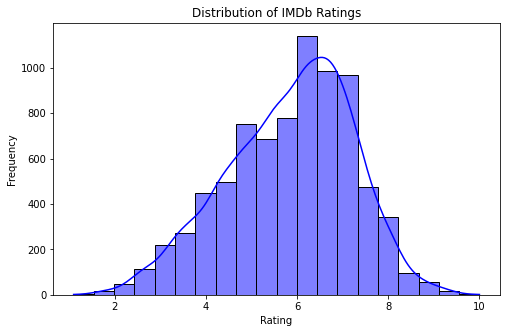

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [9]:
df['Year'] = df['Year'].str.extract('(\d{4})').astype(float)

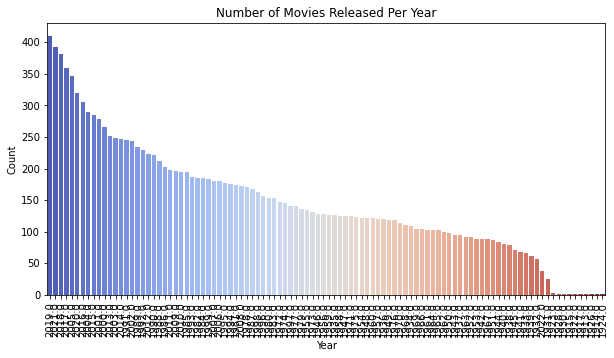

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Year'], order=df['Year'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

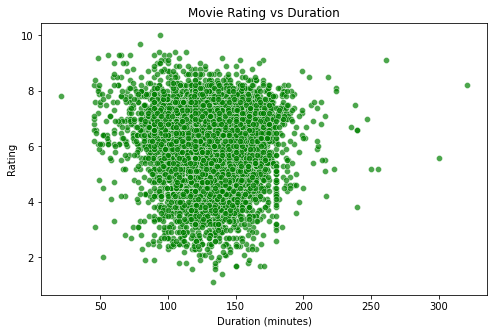

In [11]:
plt.figure(figsize=(8, 5))
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)  # Convert to float before plotting
sns.scatterplot(x=df['Duration'], y=df['Rating'], alpha=0.7, color='green')
plt.title("Movie Rating vs Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Rating")
plt.show()

# Feature Selection & Data Splitting

Selected Features: Year, Duration, Votes, Genre, Director, and Actors.
Target Variable: IMDb Rating.
Splitting: Data is divided into 80% training and 20% testing.

In [12]:
df['Votes'] = df['Votes'].astype(str).replace({'\\$|M|K|,': ''}, regex=True).astype(float)
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('Unknown', inplace=True)

In [13]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Director'] = le.fit_transform(df['Director'])
df['Actor 1'] = le.fit_transform(df['Actor 1'])
df['Actor 2'] = le.fit_transform(df['Actor 2'])
df['Actor 3'] = le.fit_transform(df['Actor 3'])

In [14]:
features = ['Year', 'Duration', 'Votes', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = df[features]
y = df['Rating']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

StandardScaler is used to normalize numerical values for better model performance.

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training & Prediction

RandomForestRegressor with 100 estimators is used to train the model.
Predictions are generated for the test dataset.

In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

Performance Metrics:

Mean Absolute Error (MAE) – Measures average prediction error.

Mean Squared Error (MSE) – Penalizes larger errors more heavily.

R² Score – Indicates model accuracy (closer to 1 is better).

Visualization: A scatter plot compares actual vs predicted IMDb ratings.

In [18]:
y_pred = model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.4265438426821406
Mean Squared Error: 0.6455367153449388
R-squared Score: 0.3361474241909257


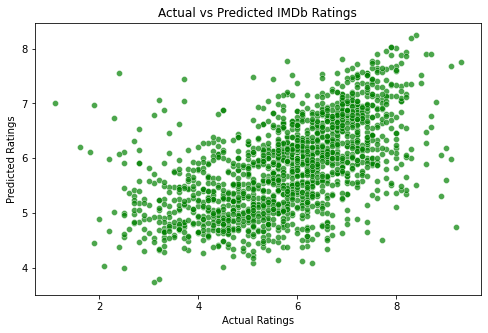

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='green')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted IMDb Ratings')
plt.show()

# Conclusion

The model provides insights into how different factors influence IMDb ratings.
The Random Forest model performed well, but improvements like hyperparameter tuning or feature engineering could enhance accuracy.
The project demonstrates the importance of data preprocessing, feature selection, and model evaluation in machine learning.